# Lecture 5: NumPy
ENVR 890-010: Python for Environmental Research, Fall 2022

September 16, 2022

Modified from Andrew Hamilton. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Summary
Today we will be looking at a more advanced data structure called a **NumPy array**. Along the way, we will learn how **logical indexing** can be used with NumPy as a powerful tool to retrieve and manipulate particular subsets of data.

## NumPy
[NumPy](https://numpy.org/doc/stable/) is one of the most popular packages for scientific computing and data science, and is included in the standard Anaconda installation. It is commonly imported with the **alias** ``np``. 

In [2]:
import numpy as np

### Creating NumPy arrays
NumPy supports a new type of data structure: the **NumPy array**. NumPy arrays are designed to handle large, multi-dimensional arrays of numbers much more easily and efficiently than standard lists.

In [ ]:
# here is a standard list with two dimensions
l = [[1, 2, 3, 4, 5], [10, 9, 8, 7, 6]]
print(l, type(l))

In [ ]:
# create a 2D numpy array from l
a = np.array(l)
print(a, type(a))

Note that, unlike the basic data structures such as lists, **all elements in a NumPy array must be the same type**. Although string types are allowed, NumPy is most commonly used with numeric types such as int and float.

We access the elements the same way as lists:

In [ ]:
print(l[1][0])
print(a[1][0])

Or, alternatively, in a single brackets and separated by a comma:

In [ ]:
print(a[0, 2])

We can get the number of dimensions and the shape of an array using its ``ndim`` and ``shape`` **properties**. For a 2D array, the shape is (number of rows, number of columns). For larger arrays, it always goes from the innermost set of brackets to the outermost set of brackets.

In [1]:
print( a.ndim )
print( a.shape )
print()

NameError: name 'a' is not defined

## In-class Exercise 
Create a for loop that iterates over both the rows and columns of a and prints out the values. 

We can also do multi-dimensional **slices**

In [ ]:
print(a[:, 1:4])

NumPy also has handy **functions** for creating different types of arrays. For example, we can create a new array filled with ones or zeros:

In [ ]:
# with a single argument, we will get a 1D array of that length
a = np.ones(3)
print(a, a.shape)

In [ ]:
# alternatively, we can give a tuple or list for multi-dimensional arrays
a = np.zeros((3, 10, 20))
print(a, a.shape)

We can also create **sequences** of numbers easily (similar to list(range()) for lists):

In [ ]:
# with one argument, it is assumed to start at zero and count up by one until it reaches your number (not inclusive, it will stop before your number)
a = np.arange(10)
print(a, type(a))

In [ ]:
# with two arguments, it will start at the 1st number and count up by 1 until reaching the 2nd number
a = np.arange(100, 120)
print(a)

In [ ]:
# with three arguments, it will start at the 1st and count by increments of the 3rd number until it reaches the 2rd number (again not inclusive)
a = np.arange(10, -21, -2.5)
print(a)

We can draw **random samples** from a normal distribution (or many other distributions). NumPy has functions for creating whole arrays at a time, rather than the one-by-one approach needed for the ``random`` module.

In [ ]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)

### Doing math with NumPy
NumPy makes it very easy to do **element-wise** arithmetic within and between arrays. 

In [ ]:
a = np.array([1, 2, 3])
b = a + 3
print(b)

In [ ]:
c = a * 2
print(c)

Note this behavior is different than for lists, where "+" means append and "*" means replicate. For NumPy, the operations are simply applied to each element.

In [ ]:
d = a ** 2
print(d)

In [ ]:
e = a + d
print(e)

In [ ]:
f = a ** a
print(f)

NumPy also has many useful functions that perform more complex **mathematical operations** on these arrays. Below are some examples, and many more can be found [here](https://www.geeksforgeeks.org/numpy-mathematical-function/)

In [ ]:
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
print(a)
print()

# statistics
print(f'Min: {a.min()}')
print()

In [ ]:
print(f'Max of each row: {a.max(axis=1)}' )
print()

In [ ]:
print(f'Mean of each column: {a.mean(axis=0)}' )
print()

In [ ]:
print(f'Std: {a.std()}' )
print()

In [ ]:
print(f'5th percentile: {np.quantile(a, 0.05)}' )
print()

In [ ]:
print(f'Sum of each row: {a.sum(axis=1)}')

In [ ]:
# sort each row
print( np.sort(a, axis=1) )

In [ ]:
# absolute value of each element
print( np.abs(a) )

In [ ]:
# exponential
print( np.exp(a) )

In [ ]:
# square root. 
print( np.sqrt(a) )

Don't be alarmed by the red "RuntimeWarning" here. Usually as long as it is a warning, not an error, you are ok. This warning relates to the special "nan" (Not A Number) values that you see above. These occur when we try to take the square root of a negative number. NumPy returns this special object (np.nan) when we try to do calculations that are undefined.

Rather than element-wise operations, we can also do **matrix operations**. (If your research involves linear algebra, see [here](https://www.geeksforgeeks.org/numpy-linear-algebra/?ref=lbp) for more examples.)

In [ ]:
A = a[:3, :3]
print(A)
print()

In [ ]:
B = a[-3:, -3:]
print(B)

In [ ]:
# matrix multiplication
print( np.matmul(A, B) )

In [ ]:
# determinant
print( np.linalg.det(A) )

### Logical indexing
**Logical indexing** is a powerful way to manipulate parts of your data that meet certain conditions. The idea is to create a NumPy array of Boolean variables, and then use this array to index a new array. For example, we can change all undefined elements in the array to zero as follows:

In [ ]:
### create array of square roots, some of which are undefined
a = np.random.normal(loc = 10, scale = 8, size = (10, 10))
b = np.sqrt(a)
print(b)

In [ ]:
### create boolean array with "True" everywhere there is an "nan" value, using np.isnan() function
c = np.isnan(b)
print(c)

In [ ]:
### create a copy of b, then reset all nan's to 0 using logical indexing
d = b.copy()
d[c] = 0
# print(b)
print(d)

This can be thought of as a compact representation of two for loops and and one if statement:

In [ ]:
### equivalent operations to logical indexing with for loops & if statement
e = b.copy()
for i in range(e.shape[0]):
    for j in range(e.shape[1]):
        if np.isnan(e[i,j]):
            e[i,j] = 0
print(e)
print()

In [ ]:
### compare e & d, check if each element is equivalent
print(e == d)
print()

### check if all elements are equivalent
print(np.all(e == d))

We can also retrieve particular elements of the NumPy array using logical indexing, which is analagous to list comprehension. However, note that we lose the shape of the array when we pick out particular elements.

In [ ]:
print(e)

In [ ]:
### which elements are greater than 4?
f = e > 4
print(f)

In [ ]:
### get new array with just these values
g = e[f]
print(g)
print()
print(f.shape)

In [ ]:
### often easier to put logical condition right inside brackets instead of defining as separate variable
g = e[e > 4]
print(g)

To apply multiple logical operations at once, we have to use the **bitwise comparison operators** (``&`` and ``|``) rather than the normal comparison operators (``and`` and ``or``). This is because we want the "and/or" to be applied to each element in the array individually, rather than for the entire array at once.

In [ ]:
lt2 = e < 2
print(lt2)

In [ ]:
gte4 = e >= 4
print(gte4)

In [ ]:
lt2_or_gte4 = lt2 | gte4
print(lt2_or_gte4)

In [ ]:
### this will cause an error, unlike with individual boolean variables
# lt2_or_gte4 = lt2 or gte4

In [ ]:
g = e[lt2_or_gte4]
print(g)
print(g.shape)

### In class exercise
Let's pretend you are an air quality specialist who is investigating the [effects of wildfire smoke on PM10 pollution](https://www.climacell.co/blog/pm10-how-wildfires-actually-affect-air-quality/). Assume there is a large wildfire burning in the Bozeman, MT, area (45.677, -111.043), and you have a map of PM10 over the larger region spanning from 40 to 48 degrees latitude and -120 to -102 degrees longitude, at a grid resolution of 1 degrees. 

We will make up fake data using an assumed quadratic trend centered around Bozeman, plus random noise. But the same analysis could be performed using ground measurements or satellite observations of PM10.

In [3]:
## use np.arange to create a grid of coordinates
res = 1
long_box = (-120, -102)
lat_box = (40, 48)
long_grid = np.arange(long_box[0], long_box[1] + 0.01, res)
lat_grid = np.arange(lat_box[1], lat_box[0] - 0.01, -res)
long_n = len(long_grid)
lat_n = len(lat_grid)
print(long_grid) 
print(lat_grid)

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102.]
[48. 47. 46. 45. 44. 43. 42. 41. 40.]


In [4]:
## create list of coords, check orientations
coords = [(long, lat) for lat in lat_grid for long in long_grid]
print(coords)

[(-120.0, 48.0), (-119.0, 48.0), (-118.0, 48.0), (-117.0, 48.0), (-116.0, 48.0), (-115.0, 48.0), (-114.0, 48.0), (-113.0, 48.0), (-112.0, 48.0), (-111.0, 48.0), (-110.0, 48.0), (-109.0, 48.0), (-108.0, 48.0), (-107.0, 48.0), (-106.0, 48.0), (-105.0, 48.0), (-104.0, 48.0), (-103.0, 48.0), (-102.0, 48.0), (-120.0, 47.0), (-119.0, 47.0), (-118.0, 47.0), (-117.0, 47.0), (-116.0, 47.0), (-115.0, 47.0), (-114.0, 47.0), (-113.0, 47.0), (-112.0, 47.0), (-111.0, 47.0), (-110.0, 47.0), (-109.0, 47.0), (-108.0, 47.0), (-107.0, 47.0), (-106.0, 47.0), (-105.0, 47.0), (-104.0, 47.0), (-103.0, 47.0), (-102.0, 47.0), (-120.0, 46.0), (-119.0, 46.0), (-118.0, 46.0), (-117.0, 46.0), (-116.0, 46.0), (-115.0, 46.0), (-114.0, 46.0), (-113.0, 46.0), (-112.0, 46.0), (-111.0, 46.0), (-110.0, 46.0), (-109.0, 46.0), (-108.0, 46.0), (-107.0, 46.0), (-106.0, 46.0), (-105.0, 46.0), (-104.0, 46.0), (-103.0, 46.0), (-102.0, 46.0), (-120.0, 45.0), (-119.0, 45.0), (-118.0, 45.0), (-117.0, 45.0), (-116.0, 45.0), (-115.0

In [5]:
## assume a quadratic spatial trend for pm10
long_bozeman = -111.043
lat_bozeman = 45.677
def quadratic_trend(long, lat):
    return -1.3*((long - long_bozeman) **2 + (lat - lat_bozeman) **2) + 160

In [6]:
pm10 = np.array([quadratic_trend(longlat[0], longlat[1]) for longlat in coords])
print(pm10)
print(pm10.shape)

[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
 141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
 140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
  46.6761686  53.4283686  75.4165686  94.8047686 111.5929686 125.7811686
 137.3693686 146.3575686 152.7457686 156.5339686 157.7221686 156.3103686
 152.2985686 145.6867686 136.4749686 124.6631686 110.2513686  93.2395686
  73.6277686  51.4159686  55.5681686  77.5563686  96.9445686 113.7327686
 127.9209686 139.5091686 148.4973686 154.8855686 158.6737686 159.8619686
 158.4501686 154.4383686 147.8265686 138.6147686 126.8029686 112.3911686
  95.3793686  75.7675686  53.5557686  55.1079686  77.0961686  96.4843686
 113.2725686 127.4607686 139.0489686 148.0371686 154.4253686 158.2135686
 159.4017686 157.9899686 153.9781686 147.3663686 138.1545686 126.3427686
 111.9309686  94.9191686  75.3073686  53.0955686  52.0477686  74.0359686
  93.4241686 110.2123686 124.4005686 135.9887686 14

In [7]:
## reshape pm10 observations to match the lat/long shape
pm10 = pm10.reshape([lat_n, long_n])
print(pm10)

print(pm10.shape)

[[ 48.6885686  70.6767686  90.0649686 106.8531686 121.0413686 132.6295686
  141.6177686 148.0059686 151.7941686 152.9823686 151.5705686 147.5587686
  140.9469686 131.7351686 119.9233686 105.5115686  88.4997686  68.8879686
   46.6761686]
 [ 53.4283686  75.4165686  94.8047686 111.5929686 125.7811686 137.3693686
  146.3575686 152.7457686 156.5339686 157.7221686 156.3103686 152.2985686
  145.6867686 136.4749686 124.6631686 110.2513686  93.2395686  73.6277686
   51.4159686]
 [ 55.5681686  77.5563686  96.9445686 113.7327686 127.9209686 139.5091686
  148.4973686 154.8855686 158.6737686 159.8619686 158.4501686 154.4383686
  147.8265686 138.6147686 126.8029686 112.3911686  95.3793686  75.7675686
   53.5557686]
 [ 55.1079686  77.0961686  96.4843686 113.2725686 127.4607686 139.0489686
  148.0371686 154.4253686 158.2135686 159.4017686 157.9899686 153.9781686
  147.3663686 138.1545686 126.3427686 111.9309686  94.9191686  75.3073686
   53.0955686]
 [ 52.0477686  74.0359686  93.4241686 110.2123686 12

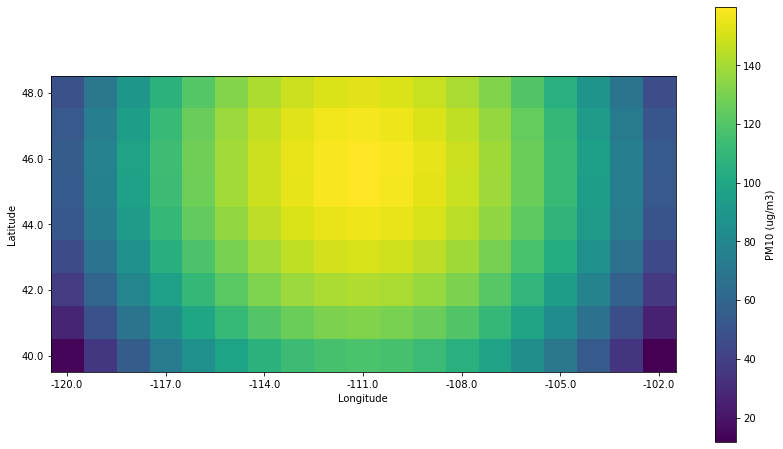

In [8]:
## plot values on a grid. Don't worry too much about how this works yet - we will learn about plotting in a couple of weeks.
import matplotlib.pyplot as plt

def plot_grid(data, long_grid, lat_grid, label):
    fig, ax = plt.subplots(1,1, figsize=(14,8))
    plt.imshow(data)
    plt.colorbar(label = label)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    ax.set_xticks(list(range(0, len(long_grid), 3)))
    ax.set_yticks(list(range(0, len(lat_grid), 2)))
    ax.set_xticklabels(long_grid[::3])
    ax.set_yticklabels(lat_grid[::2])
    
    
plot_grid(pm10, long_grid, lat_grid, 'PM10 (ug/m3)')

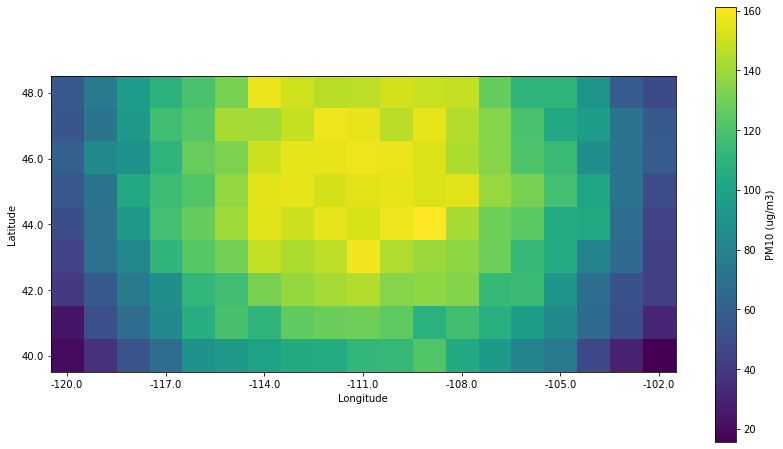

In [9]:
### Now use np.random.normal() to add random noise to the data, with mean and standard distribution of 0 and 5 ug/m3
noise = np.random.normal(0,5,(lat_n, long_n))
pm10_noisy = pm10 + noise

plot_grid(pm10_noisy, long_grid, lat_grid, 'PM10 (ug/m3)')

We will now assume that this "synthetic" dataset is our real data set and use it for analysis. The US EPS's national 24-hour daily standard for PM10 is 150 ug/m3 (for the max 24-hour concentration in one year, averaged over three years. But we will just treat it as a one-day standard for simplicity.)

Use NumPy's built-in functions to answer the following questions:
1. What are the mean and std of PM10 across this region today?

2. Find the mean PM10 for each longitude and latitude.

3. Which longitude has the highest mean PM10? Which latitude has the lowest PM10?

3. What fraction of grid points exceed the EPA daily standard?

4. Use logical indexing to create an array with 1's at locations violating the standard, and 0's at locations not violating the standard. Plot using ``plot_grid``.

5. Assume the following  logistic function (*completely made up, not a real relationship*) for excess cardiovascular deaths per 1,000 people in the region, based on the daily PM10 concentration. 

$$deaths = \frac{15}{1 + \exp(-(PM10 - 80) / 35)}$$

Create a function that uses NumPy to calculate the excess cardio deaths for a grid of pm10 observations, then calculate and plot the grid of excess deaths.